In [30]:
import numpy as np
import h5py
%matplotlib inline
from IPython.display import Image
import pandas as pd

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'large',
         'ytick.labelsize': 'large'}
pylab.rcParams.update(params)

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#tag = 'gri_cosmos'
tag = 'gri'
base_dir = '/scratch/ksf293/kavli/anomaly'
imarr_fn = f'{base_dir}/data/images_h5/images_{tag}.h5'
results_fn = f'{base_dir}/results/results_{tag}.h5'
imdict_fn = f'{base_dir}/data/idxdicts_h5/idx2imloc_{tag}.npy'
resdict_fn = f'{base_dir}/data/idxdicts_h5/idx2resloc_{tag}.npy'

In [3]:
plot_dir = '../papers/paper_main/images'

In [4]:
imarr = h5py.File(imarr_fn, 'r')
res = h5py.File(results_fn, 'r')
print(imarr.keys())
print(res.keys())
print(len(imarr['idxs']))

<KeysViewHDF5 ['idxs', 'images', 'object_ids']>
<KeysViewHDF5 ['anomaly_scores', 'anomaly_scores_norm', 'disc_scores', 'disc_scores_norm', 'gen_scores', 'gen_scores_norm', 'idxs', 'object_ids', 'reconstructed']>
942782


# anomaly score distribution

In [51]:
def plot_anomaly_dist(gens, discs, sanoms, title=None):
    
    print(min(gens), max(gens), np.mean(gens), np.std(gens))
    print(min(discs), max(discs), np.mean(discs), np.std(discs))

    minmin = min(min(gens), min(discs))
    maxmax = max(max(gens), max(discs))
    bins = np.linspace(minmin, maxmax, 200)
    
    fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(hspace=0.2)
    
    fig.suptitle(title)

    ax0 = axarr[0]
    b = ax0.hist(gens, bins=bins, alpha=1, color='blue', label='generator \nscore $(s_\mathrm{gen})$', histtype='step')
    b = ax0.hist(discs, bins=bins, alpha=1, color='red', label='discriminator \nscore $(s_\mathrm{disc})$', histtype='step')
    b = ax0.hist(sanoms, bins=bins, alpha=1, color='purple', label='total \nscore $(s_\mathrm{anom})$', histtype='step', lw=2)

    mean = np.mean(sanoms)
    std = np.std(sanoms)
    
    lcolor='k'
    ax0.axvline(mean, lw=1, color=lcolor)
    ax0.axvline(mean+std, lw=0.8, color=lcolor, ls='--')
    ax0.axvline(mean-std, lw=0.8, color=lcolor, ls='--')
    ax0.axvline(mean+2*std, lw=0.6, color=lcolor, ls='--')
    ax0.axvline(mean-2*std, lw=0.6, color=lcolor, ls='--')
    ax0.axvline(mean+3*std, lw=0.4, color=lcolor, ls='--')
    ax0.axvline(mean-3*std, lw=0.4, color=lcolor, ls='--')
    
    ax0.legend()
    ax0.set_xlabel("score")
    ax0.set_ylabel("#")
    ax0.set_xlim(0,0.35)
    
    
    ax1 = axarr[1]
    scat = ax1.scatter(gens, discs, s=2, c=sanoms, alpha=0.6, cmap='plasma_r', vmin=0.0, vmax=0.3)
    cbar = fig.colorbar(scat, extend='max', ax=ax1)
    cbar.set_label(r'$s_\mathrm{anom}$, anomaly score', rotation=270, labelpad=18)

    xx = np.linspace(0,maxmax,100)
    ax1.plot(xx, xx, color='k', lw=0.5)

    ax1.set_xlabel(r"$s_\mathrm{gen}$, generator score")
    ax1.set_ylabel(r"$s_\mathrm{disc}$, discriminator score")

    ax1.set_xlim(0, maxmax)
    ax1.set_ylim(0, maxmax)

In [44]:
gen_scores = res['gen_scores_norm']
disc_scores = res['disc_scores_norm']
scores = res['anomaly_scores_norm']

In [45]:
gen_scores = np.array(gen_scores)
disc_scores = np.array(disc_scores)
scores = np.array(scores)

0.0 1.0 0.12705988 0.031862617
0.06612287 1.0661229 0.12705988 0.017146247


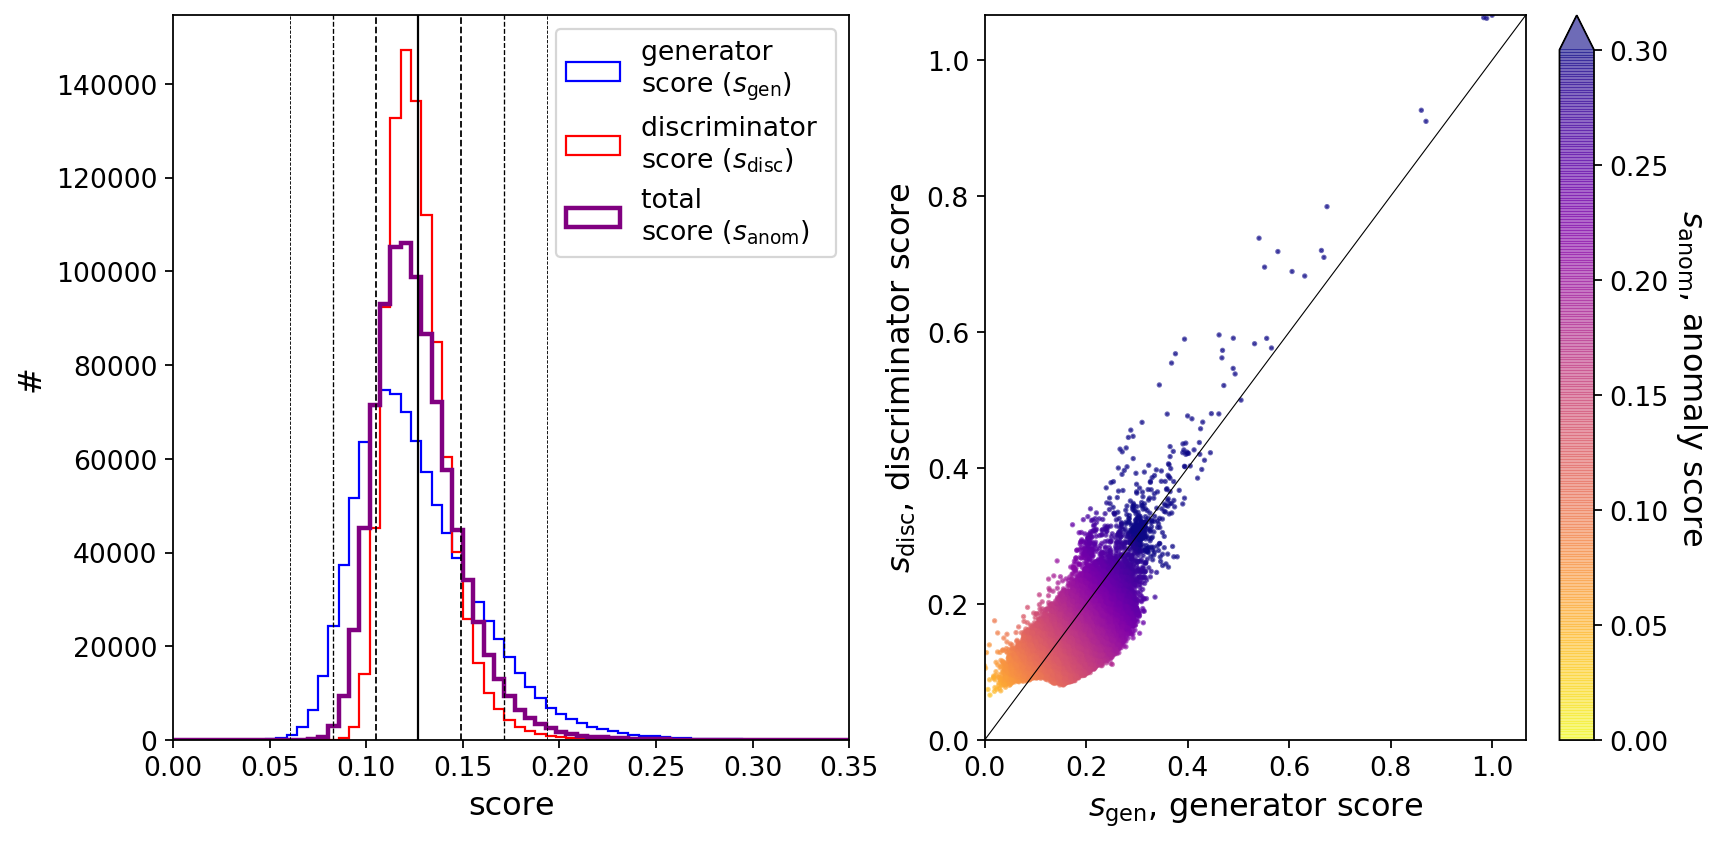

In [52]:
plot_anomaly_dist(gen_scores, disc_scores, scores)

Text(0, 0.5, 'count')

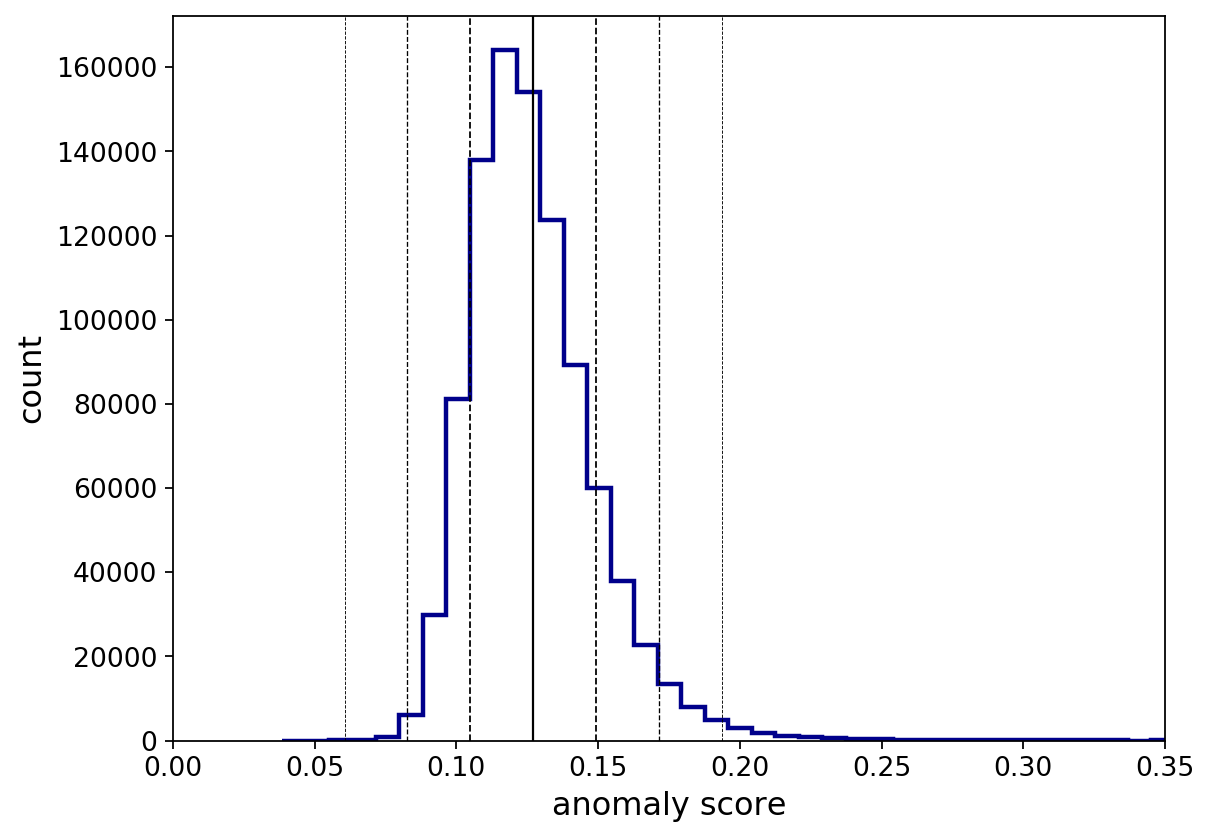

In [34]:
scores = res['anomaly_scores_norm']
mean = np.mean(scores)
std = np.std(scores)

xmax = 0.35
plt.figure(figsize=(8,6))
plt.hist(scores, bins=120, histtype='step', color='darkblue', lw=2)

lcolor='k'
plt.axvline(mean, lw=1, color=lcolor)
plt.axvline(mean+std, lw=0.8, color=lcolor, ls='--')
plt.axvline(mean-std, lw=0.8, color=lcolor, ls='--')
plt.axvline(mean+2*std, lw=0.6, color=lcolor, ls='--')
plt.axvline(mean-2*std, lw=0.6, color=lcolor, ls='--')
plt.axvline(mean+3*std, lw=0.4, color=lcolor, ls='--')
plt.axvline(mean-3*std, lw=0.4, color=lcolor, ls='--')

plt.xlim(0,xmax)
plt.xlabel('anomaly score')
plt.ylabel('count')

In [35]:
offplot = np.where(np.array(scores) > xmax)[0]
n_offplot = len(offplot)
print(f"Number of objects off plot with scores>{xmax}: {n_offplot}")

Number of objects off plot with scores>0.35: 96


(0, 1)

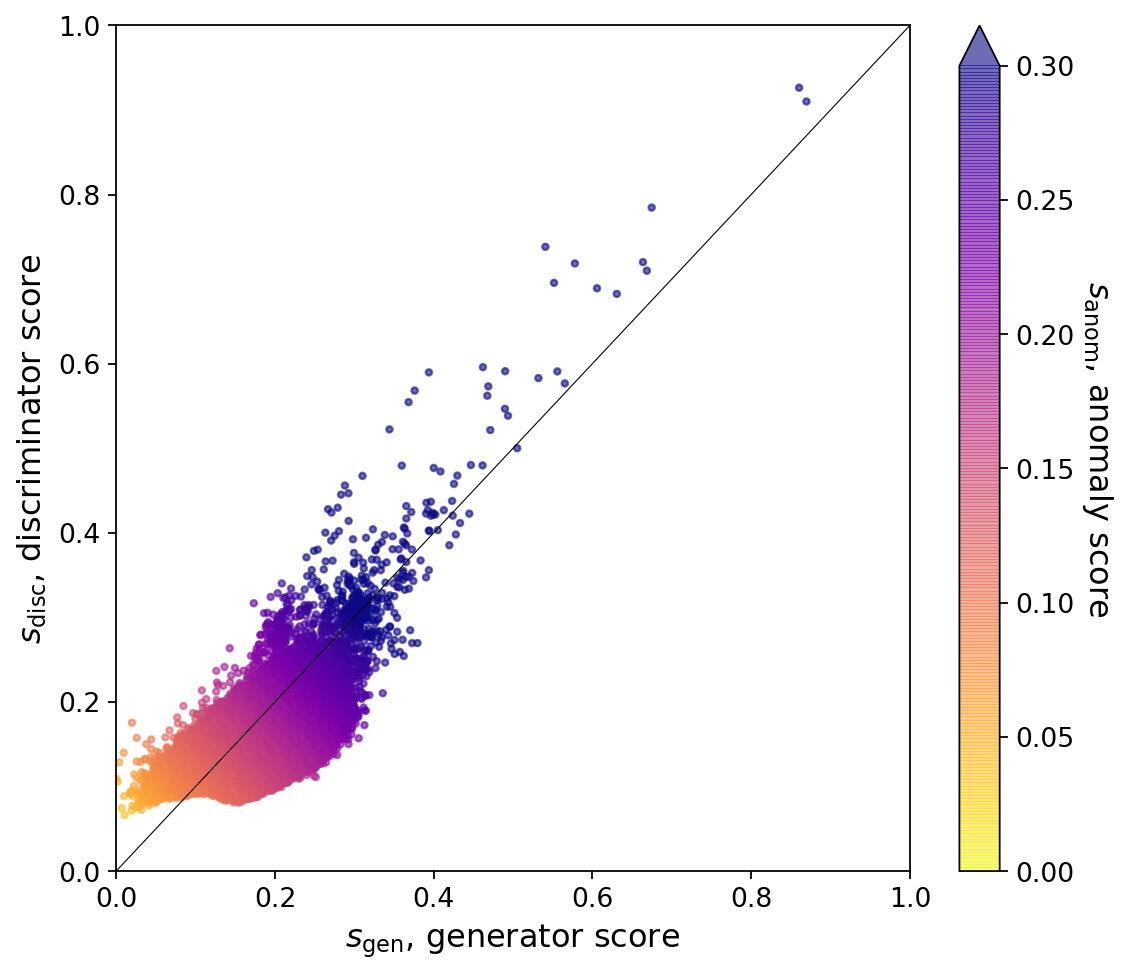

In [40]:
gen_scores = res['gen_scores_norm']
disc_scores = res['disc_scores_norm']


plt.figure(figsize=(8,7))
plt.scatter(gen_scores, disc_scores, s=8, c=scores, alpha=0.6, cmap='plasma_r', vmin=0.0, vmax=0.3)
cbar = plt.colorbar(extend='max')
cbar.set_label(r'$s_\mathrm{anom}$, anomaly score', rotation=270, labelpad=18)
#plt.gca().set_aspect('equal', 'datalim')

xx = np.linspace(0,1,100)
plt.plot(xx, xx, color='k', lw=0.5)

plt.xlabel(r"$s_\mathrm{gen}$, generator score")
plt.ylabel(r"$s_\mathrm{disc}$, discriminator score")

# plt.xlim(0, xmax)
# plt.ylim(0, xmax)
plt.xlim(0, 1)
plt.ylim(0, 1)